**SCORE PREDICTION**

Step 1: Data Preprocessing

In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib

# Read data
data = pd.read_csv('data.csv')

# Drop unnecessary columns for training the model
columns_to_drop = ['mid', 'date', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
data.drop(columns_to_drop, axis=1, inplace=True)

# Encode categorical variables
cat_vars = ['batting_team', 'bowling_team']
label_encoders = {}
for var in cat_vars:
    label_encoders[var] = LabelEncoder()
    data[var] = label_encoders[var].fit_transform(data[var])

# Save label encoders for later use
joblib.dump(label_encoders, 'label_encoders.pkl')

# Split data into features and target
X = data.drop('total', axis=1)
y = data['total']

Step 2: Train/Test Split and Model Initialization

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Linear Regression': LinearRegression()
}

Step 3: Model Training and Evaluation

In [26]:
from sklearn.metrics import r2_score

# Train and evaluate each model
best_model = None
best_score = -float('inf')

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate model using R-squared
    score = r2_score(y_test, y_pred)

    # Save the best model based on evaluation metric (R-squared)
    if score > best_score:
        best_score = score
        best_model = model

        # Optionally, you can also save the best model immediately if needed
        joblib.dump(best_model, 'best_model.pkl')

# Dump the best model to a file
if best_model is not None:
    joblib.dump(best_model, 'best_model.pkl')

STEP 4 : Getting the accuracy

In [23]:
# Train the models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
lr_model = LinearRegression()

# Function to train and evaluate models
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return model, mae, mse, r2

# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate each model
rf_model, rf_mae, rf_mse, rf_r2 = train_and_evaluate(rf_model, X_train, y_train, X_test, y_test)
gb_model, gb_mae, gb_mse, gb_r2 = train_and_evaluate(gb_model, X_train, y_train, X_test, y_test)
lr_model, lr_mae, lr_mse, lr_r2 = train_and_evaluate(lr_model, X_train, y_train, X_test, y_test)

# Print model evaluation metrics
print("Random Forest Metrics:")
print(f" MAE: {rf_mae:.2f}")
print(f" MSE: {rf_mse:.2f}")
print(f" R2 Score: {rf_r2:.2f}")
print("\nGradient Boosting Metrics:")
print(f" MAE: {gb_mae:.2f}")
print(f" MSE: {gb_mse:.2f}")
print(f" R2 Score: {gb_r2:.2f}")
print("\nLinear Regression Metrics:")
print(f" MAE: {lr_mae:.2f}")
print(f" MSE: {lr_mse:.2f}")
print(f" R2 Score: {lr_r2:.2f}")


Random Forest Metrics:
 MAE: 6.95
 MSE: 153.07
 R2 Score: 0.82

Gradient Boosting Metrics:
 MAE: 14.46
 MSE: 382.93
 R2 Score: 0.55

Linear Regression Metrics:
 MAE: 14.80
 MSE: 402.05
 R2 Score: 0.52


Step 5: Actual vs Predicted Visualization

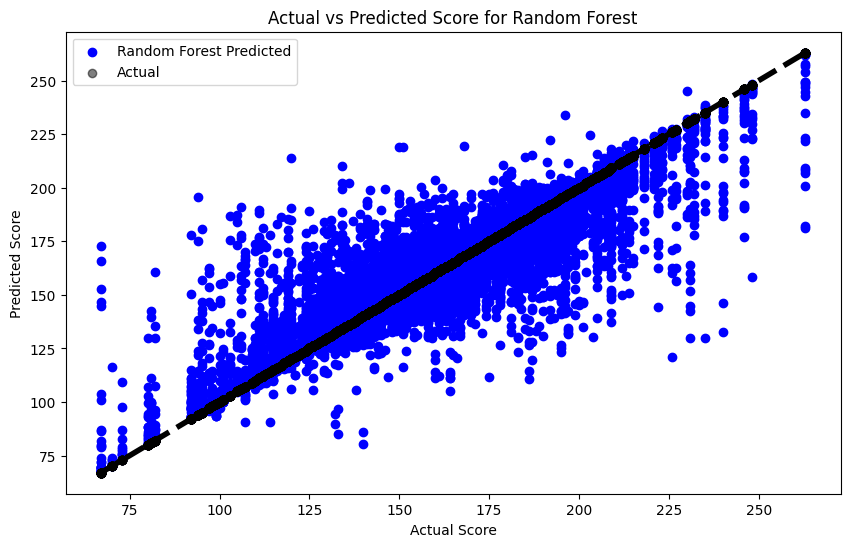

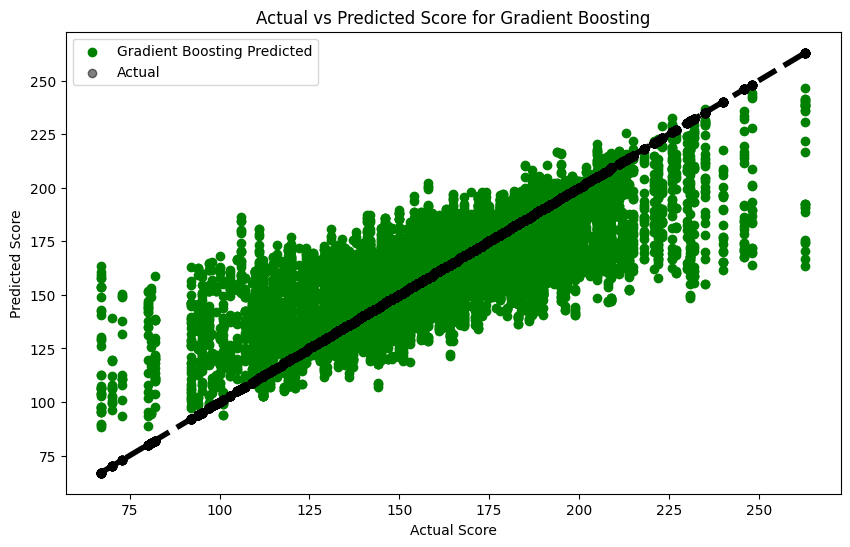

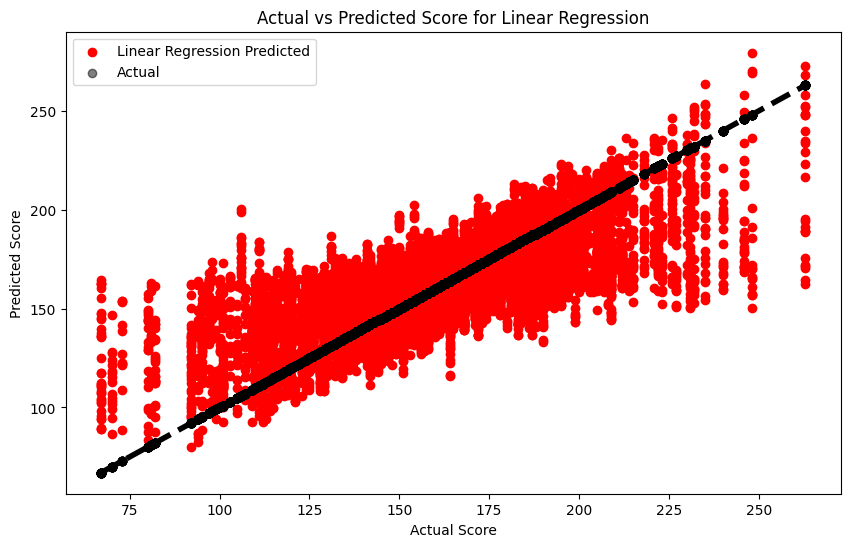

In [27]:
# Predicted vs Actual Plot for each model with different colors
colors = ['blue', 'green', 'red']  # Define colors for each model

for idx, (name, model) in enumerate(models.items()):
    plt.figure(figsize=(10, 6))
    y_pred = model.predict(X_test)

    # Plot actual vs predicted with different colors
    plt.scatter(y_test, y_pred, color=colors[idx], label=f'{name} Predicted')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.scatter(y_test, y_test, color='black', alpha=0.5, label='Actual')  # Actual values as black dots

    plt.xlabel('Actual Score')
    plt.ylabel('Predicted Score')
    plt.title(f'Actual vs Predicted Score for {name}')
    plt.legend()
    plt.show()

Step 6: Interactive Prediction Setup

In [ ]:
import joblib
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from ipywidgets import interact, widgets

# Function to shorten team names
def shorten_team_names(input_data, label_encoders):
    for var in ['batting_team', 'bowling_team']:
        if input_data[var] in label_encoders[var].classes_:
            input_data[var] = label_encoders[var].transform([input_data[var]])[0]
        else:
            # Handle new label gracefully (e.g., fallback to original value)
            input_data[var] = label_encoders[var].transform([label_encoders[var].classes_[0]])[0]  # Fallback to first class
    return input_data

# Function to predict score
def predict_score(input_data):
    # Load label encoders
    label_encoders = joblib.load('label_encoders.pkl')

    # Load best model
    model = joblib.load('best_model.pkl')

    # Shorten team names
    input_data = shorten_team_names(input_data, label_encoders)

    # Create DataFrame for prediction
    input_df = pd.DataFrame([input_data])

    # Apply label encoding to categorical variables
    cat_vars = ['batting_team', 'bowling_team']
    for var in cat_vars:
        if input_df[var].dtype == 'object':
            input_df[var] = label_encoders[var].transform(input_df[var])

    # Make prediction
    prediction = model.predict(input_df)
    return prediction[0]


Step 7: Interactive Prediction Function

In [ ]:
# Function to handle interactive prediction
def predict_interactively():
    # Load label encoders
    label_encoders = joblib.load('label_encoders.pkl')

    # Create dropdown widgets for team selection
    all_teams = label_encoders['batting_team'].classes_
    team_options = {label_encoders['batting_team'].inverse_transform([i])[0]: i for i in range(len(all_teams))}
    batting_team_dropdown = widgets.Dropdown(options=team_options, description='Batting Team:')
    bowling_team_dropdown = widgets.Dropdown(options=team_options, description='Bowling Team:')

    # Create sliders for runs, wickets, overs, runs_last_5, and wickets_last_5
    runs_slider = widgets.FloatSlider(min=0.0, max=300.0, step=1, description='Runs:')
    wickets_slider = widgets.IntSlider(min=0, max=10, step=1, description='Wickets:')
    overs_slider = widgets.FloatSlider(min=0.0, max=20.0, step=0.1, description='Overs:')
    runs_last_5_slider = widgets.IntSlider(min=0, max=100, step=1, description='Runs in last 5 overs:')
    wickets_last_5_slider = widgets.IntSlider(min=0, max=10, step=1, description='Wickets in last 5 overs:')

    # Define function to handle prediction and display
    def handle_prediction(batting_team, bowling_team, runs, wickets, overs, runs_last_5, wickets_last_5):
        # Map team index back to original team name
        batting_team_name = label_encoders['batting_team'].inverse_transform([batting_team])[0]
        bowling_team_name = label_encoders['batting_team'].inverse_transform([bowling_team])[0]

        # Calculate total overs and balls
        total_overs = int(overs)
        balls = int((overs % 1) * 10)

        # Ensure maximum of 0.6 overs
        if balls > 6:
            total_overs += 1
            balls = 0

        # Create input data dictionary
        input_data = {
            'batting_team': batting_team_name,
            'bowling_team': bowling_team_name,
            'runs': runs,
            'wickets': wickets,
            'overs': total_overs + balls/10.0,
            'runs_last_5': runs_last_5,
            'wickets_last_5': wickets_last_5
        }

        # Predict score
        predicted_score = predict_score(input_data)

        # Display prediction
        print(f'\nPredicted score:\n'
              f'Batting Team: {batting_team_name}\n'
              f'Bowling Team: {bowling_team_name}\n'
              f'Runs: {runs}\n'
              f'Wickets: {wickets}\n'
              f'Overs: {total_overs}.{balls}\n'
              f'Runs in last 5 overs: {runs_last_5}\n'
              f'Wickets in last 5 overs: {wickets_last_5}\n'
              f'Predicted score: {predicted_score:.2f}')

    # Create interactive widgets for input parameters
    interact(handle_prediction,
             batting_team=batting_team_dropdown,
             bowling_team=bowling_team_dropdown,
             runs=runs_slider,
             wickets=wickets_slider,
             overs=overs_slider,
             runs_last_5=runs_last_5_slider,
             wickets_last_5=wickets_last_5_slider)

predict_interactively()

interactive(children=(Dropdown(description='Batting Team:', options={'Chennai Super Kings': 0, 'Deccan Charger…